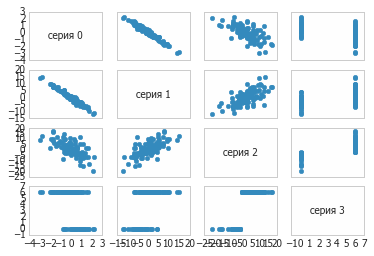

In [1]:
# -*- coding: utf-8 -*-
"""
Глава 10, рис. 4
"""

import math, random
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline  

mpl.style.use('ggplot')  
mpl.style.use('seaborn-whitegrid')  
mpl.rcParams['axes.facecolor'] = u'fefefe'
#mpl.rcParams.update({'font.family': 'Ubuntu Condensed'})   
mpl.rcParams.update({'font.family': 'Tahoma'})

# Линейная алгебра    
    
# форма матрицы    
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0    # число элементов в первой строке
    return num_rows, num_cols

# получить строку 
def get_row(A, i):
    return A[i]     # A[i] – это i-ая строка

# получить столбец
def get_column(A, j):
    return [A_i[j]         # j-ый элемент строки A_i
            for A_i in A]  # для каждой строки A_i

# Вероятности

# ИФР нормального распределения    
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

# обратная ИФР нормального распределения
# (tolerance - это константа точности)
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """найти приближенную инверсию при помощи бинарного поиска"""

    # если нормальное распределение не стандартное, вычислить стандартное и нормализовать
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z, low_p = -10.0, 0            # normal_cdf(-10) = (очень близко к) 0 
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  = (очень близко к) 1 
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # взять середину
        mid_p = normal_cdf(mid_z)      # и значение ИФР в этом месте 
        if mid_p < p:
            # значение середины все еще слишком низкое, искать выше его
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # значение середины все еще слишком высокое, искать ниже 
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

# случайная выборка из нормального распределения
def random_normal():
    """возвращает случайную выборку из стандартного нормального распределения"""
    return inverse_normal_cdf(random.random())
    
    
# создать точечную матрицу    
def make_scatterplot_matrix():
    fig = plt.figure()
    
    # сначала сгенерировать немного случайных данных

    num_points = 100

    def random_row():
        row = [None, None, None, None]
        row[0] = random_normal()
        row[1] = -5 * row[0] + random_normal()
        row[2] = row[0] + row[1] + 5 * random_normal()
        row[3] = 6 if row[2] > -2 else 0
        return row
        
    random.seed(0)
    data = [random_row()
            for _ in range(num_points)]

    # затем вывести на график

    _, num_columns = shape(data)
    fig, ax = plt.subplots(num_columns, num_columns)

    for i in range(num_columns):
        for j in range(num_columns):
            ax[i][j].grid(False)

            # разбросать столбец j по оси X напротив столбца i на оси Y
            if i != j: ax[i][j].scatter(get_column(data, j), get_column(data, i), color="#348ABD" )

            # если не i == j, показать имя серии
            else: ax[i][j].annotate("серия " + str(i), (0.5, 0.5), xycoords='axes fraction', ha="center", va="center")

            # затем спрятать осевые метки за исключением левой и нижней диаграмм
            if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
            if j > 0: ax[i][j].yaxis.set_visible(False)
                
            ax[i][j].xaxis.set_ticks_position('none') 
            ax[i][j].yaxis.set_ticks_position('none')    

            #ax[i][j].xaxis.label.set_size(9)
            #ax[i][j].yaxis.label.set_size(9)

    # настроить нижнюю правую и верхнюю левую осевые метки, которые некорректны,
    # потому что на их диаграммах выводится только текст
    ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
    ax[0][0].set_ylim(ax[0][1].get_ylim())

    plt.show()
    #fig.savefig("fig_10-4", dpi=300, bbox_inches='tight', facecolor='w') 


make_scatterplot_matrix()    